In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
df_article = pd.read_csv('../data/nikkei_article.csv.gz')
df_article.head(3)

,article_id,publish_datetime,media_code,media_name,men_name,page_from,picture_flag,paragraph_cnt,char_length,headline,keywords,classifications,company_g.stock_code
0,TDSKDBDGXMZO5390477027122019PE8000,2020-01-01T00:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,有,13,1661,日米貿易協定が発効 TPP土台に自由貿易圏拡大\n日本、RCEPに波及期待,政府\n米国政府\n東アジア地域包括的経済連携\nＴＰＰ\n安倍晋三\n貿易協定\n自由貿易...,＄絵写表記事\n＃Ｗ２０２０３\n＃Ｗ２０４０４\n＃Ｗ２０２０１\n＃Ｗ２０４０１\n＃Ａ...,NaN
1,TDSKDBDGXMZO5400046031122019905M00,2020-01-01T00:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,NaN,1,35,人事、衆院,衆議院,＃Ｋ１\n＃Ｂ０６３０,NaN
2,TDSKDBDGXMZO5400047031122019905M00,2020-01-01T00:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,NaN,1,18,人事、外務省,外務省,＃Ｋ１\n＃Ｂ０６３０,NaN


* 発行媒体で市場へのインパクトは異なるのか?  
  ⇒"TNY"しかない
* 面情報で市場へのインパクトは異なるのか？(1面はインパクトがありそう?)  
  ⇒そもそもデータがない
* 写真の有無(picture_flag)はリターンに関係するのか?
* 記事の長さ(char_length)はリターンに関係するのか？

In [4]:
df_article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178393 entries, 0 to 178392
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   article_id            178393 non-null  object 
 1   publish_datetime      178393 non-null  object 
 2   media_code            178393 non-null  object 
 3   media_name            178393 non-null  object 
 4   men_name              0 non-null       float64
 5   page_from             0 non-null       float64
 6   picture_flag          75294 non-null   object 
 7   paragraph_cnt         178393 non-null  int64  
 8   char_length           178393 non-null  int64  
 9   headline              178393 non-null  object 
 10  keywords              177894 non-null  object 
 11  classifications       173346 non-null  object 
 12  company_g.stock_code  68369 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 17.7+ MB


In [5]:
df_article.groupby(by='media_code').count()

,article_id,publish_datetime,media_name,men_name,page_from,picture_flag,paragraph_cnt,char_length,headline,keywords,classifications,company_g.stock_code
media_code,,,,,,,,,,,,
TNY,178393,178393,178393,0,0,75294,178393,178393,178393,177894,173346,68369


## 写真の有無について
`company_g.stock_code`が存在するもののみを対象とする

In [6]:
stock_list = pd.read_csv('../data/stock_list.csv.gz')
codes = stock_list['Local Code'].astype(str)
stock_list.head(3)

,prediction_target,Effective Date,Local Code,Name (English),Section/Products,33 Sector(Code),33 Sector(name),17 Sector(Code),17 Sector(name),Size Code (New Index Series),Size (New Index Series),IssuedShareEquityQuote AccountingStandard,IssuedShareEquityQuote ModifyDate,IssuedShareEquityQuote IssuedShare,universe_comp2
0,True,20201230,1301,"KYOKUYO CO.,LTD.",First Section (Domestic),50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,ConsolidatedJP,2020/11/06,10928283.0,True
1,True,20201230,1332,"Nippon Suisan Kaisha,Ltd.",First Section (Domestic),50,"Fishery, Agriculture and Forestry",1,FOODS,4,TOPIX Mid400,ConsolidatedJP,2020/11/05,312430277.0,True
2,True,20201230,1333,Maruha Nichiro Corporation,First Section (Domestic),50,"Fishery, Agriculture and Forestry",1,FOODS,4,TOPIX Mid400,ConsolidatedJP,2020/11/02,52656910.0,True


In [7]:
df_target = df_article[df_article['company_g.stock_code'].isin(codes)].copy()
df_target.head(3)

,article_id,publish_datetime,media_code,media_name,men_name,page_from,picture_flag,paragraph_cnt,char_length,headline,keywords,classifications,company_g.stock_code
10,TDSKDBDGXMZO5400542031122019NN1000,2020-01-01T00:00:33+09:00,TNY,日本経済新聞電子版,NaN,NaN,有,19,1778,ゴーン元会長、周到な不意打ち出国 司法批判の声明,カルロス・ゴーン\n日産自動車\nグレッグ・ケリー\n弘中惇一郎\nＭｕｓｉｃＴｅｌｅｖｉｓ...,＄絵写表記事\nＴ７２０１\nＰＤ２７１\nＮ０００１３５１\nＮ００４４３７１\n＃Ｗ５０...,7201
19,TDSKDBDGXMZO5387164027122019L41000,2020-01-01T01:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,有,12,1347,地銀が変わる、始まったマニュアルなき大競争,金融検査マニュアル\nマニュアル\n笹原晶博\n安田光春\n金融機関\n銀行\n地方銀行\n...,＄絵写表記事\nＴ８５２４\nＰＤ４７３\nＮ００７００１７\nＮ００７００８７\n＃Ｗ２０...,8524
22,TDSKDBDGXKZO5400896001012020MM8000,2020-01-01T01:43:50+09:00,TNY,日本経済新聞電子版,NaN,NaN,NaN,4,569,元日付のこういうコラムは、ふつうなら来し方行く末に思いをはせ、まずは新年をことほぐものである...,春秋\nカルロス・ゴーン\nコラム\n来し方行く末\n思い\n日付\n新年,「春秋」\n＊春秋\nＴ７２０１\nＰＤ２７１\nＮ０００１３５１\n＃Ｗ５０３０５\n＃Ｗ...,7201


In [8]:
print('欠損値の割合:', df_target['picture_flag'].isnull().sum() / len(df_target))

欠損値の割合: 0.6049523142882142


"有" or ""(欠損値)となっている

<AxesSubplot:>

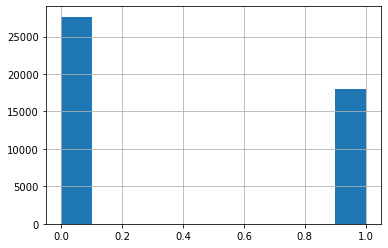

In [9]:
df_target['picture_flag'] = df_target['picture_flag'].replace('有', 1).fillna(0)
df_target['picture_flag'].hist()

少し写真が無いデータに偏りはあるが、写真があるサンプルは2万件弱あるので比較検証はできそう。  
記事の公表後(1営業日, 5営業日, 20営業日)にリターンの差があるか検証。  
記事の内容の極性(ポジティブ・ネガティブ)か区別できればリターンに対しても正負を比較してみるのも良さそう。    
今回は極性が不明のため、市場への影響(プラス, マイナス, 絶対値)を見てみることにする。  

Text(0.5, 1.0, 'published num in each hour')

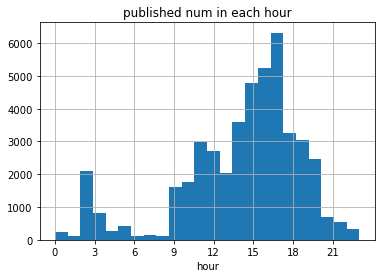

In [10]:
df_target['publish_datetime'] = pd.to_datetime(df_target['publish_datetime'])

plt.figure()
df_target['publish_datetime'].dt.hour.hist(bins=24)
plt.xticks([i for i in range(24) if i % 3 == 0])
plt.xlabel('hour')
plt.title('published num in each hour')

感覚的に既知の事実ではあるもしれない15時以降に記事に公表されてることが多い。  
時間外取引を除けば、一般的な取引時間は9:00～15:00である為、終値とニュースを関連付けは注意が必要。  
※15:00以降に公表されたニュースと当日中の終値を関連付けてはいけない。  
今回は15:00以降に公表されたニュースは翌日の終値と関連付けることにする。  
※本来は取引との兼ね合いから14:30～14:55？位を境にすべきと思われる。  
公表時間毎で市場へのインパクトが異なるかも見てみると面白いのかもしれない(今回は検証しない)

In [11]:
df_price = pd.read_csv('../data/stock_price.csv.gz', index_col='EndOfDayQuote Date', parse_dates=['EndOfDayQuote Date'])
df_price.head(3)

,Local Code,EndOfDayQuote Open,EndOfDayQuote High,EndOfDayQuote Low,EndOfDayQuote Close,EndOfDayQuote ExchangeOfficialClose,EndOfDayQuote Volume,EndOfDayQuote CumulativeAdjustmentFactor,EndOfDayQuote PreviousClose,EndOfDayQuote PreviousCloseDate,EndOfDayQuote PreviousExchangeOfficialClose,EndOfDayQuote PreviousExchangeOfficialCloseDate,EndOfDayQuote ChangeFromPreviousClose,EndOfDayQuote PercentChangeFromPreviousClose,EndOfDayQuote VWAP
EndOfDayQuote Date,,,,,,,,,,,,,,,
2016-01-04,1301,2800.0,2820.0,2740.0,2750.0,2750.0,32000.0,0.1,2770.0,2015/12/30,2770.0,2015/12/30,-20.0,-0.722,2778.250
2016-01-05,1301,2750.0,2780.0,2750.0,2760.0,2760.0,20100.0,0.1,2750.0,2016/01/04,2750.0,2016/01/04,10.0,0.364,2761.990
2016-01-06,1301,2760.0,2770.0,2740.0,2760.0,2760.0,15000.0,0.1,2760.0,2016/01/05,2760.0,2016/01/05,0.0,0.000,2758.867


In [12]:
# 日付修正処理
def convert_datetime(t):
    '''
    時刻が15時より後の場合は翌営業日の15:00に変換。それ以外は、時刻部分を15:00に変換。
    '''
    t_ret = t.replace(hour=15, minute=0, second=0)
    
    if t.time() > datetime.time(15, 0, 0):
        t_ret = t_ret + pd.offsets.BDay(1)
    
    return t_ret

df_target['publish_datetime'] = df_target['publish_datetime'].apply(convert_datetime)

In [13]:
# Check
(df_target['publish_datetime'].dt.hour != 15).sum()

0

In [14]:
df_target.head(1)

,article_id,publish_datetime,media_code,media_name,men_name,page_from,picture_flag,paragraph_cnt,char_length,headline,keywords,classifications,company_g.stock_code
10,TDSKDBDGXMZO5400542031122019NN1000,2020-01-01 15:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,1.0,19,1778,ゴーン元会長、周到な不意打ち出国 司法批判の声明,カルロス・ゴーン\n日産自動車\nグレッグ・ケリー\n弘中惇一郎\nＭｕｓｉｃＴｅｌｅｖｉｓ...,＄絵写表記事\nＴ７２０１\nＰＤ２７１\nＮ０００１３５１\nＮ００４４３７１\n＃Ｗ５０...,7201


In [15]:
returns = {'1days':[], '5days':[], '20days':[]}
for i in df_target.index:
    # 対象銘柄の価格情報
    df_price_one_code = df_price[df_price['Local Code'] == int(df_target['company_g.stock_code'][i])]

    # ニュース公表日以降を取り出し
    mask = df_price_one_code.index >= pd.to_datetime(df_target['publish_datetime'][i].date())
    df_price_one_code = df_price_one_code[mask]

    # 各リターンを格納する
    for key, num in zip(returns.keys(), [1, 5, 20]):
        try:
            returns[key].append(df_price_one_code['EndOfDayQuote ExchangeOfficialClose'].pct_change(num).dropna()[0])
        except:
            returns[key].append(np.nan)

In [16]:
df_target['1days_R'] = returns['1days']
df_target['5days_R'] = returns['5days']
df_target['20days_R'] = returns['20days']

In [17]:
df_target.head(3)

,article_id,publish_datetime,media_code,media_name,men_name,page_from,picture_flag,paragraph_cnt,char_length,headline,keywords,classifications,company_g.stock_code,1days_R,5days_R,20days_R
10,TDSKDBDGXMZO5400542031122019NN1000,2020-01-01 15:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,1.0,19,1778,ゴーン元会長、周到な不意打ち出国 司法批判の声明,カルロス・ゴーン\n日産自動車\nグレッグ・ケリー\n弘中惇一郎\nＭｕｓｉｃＴｅｌｅｖｉｓ...,＄絵写表記事\nＴ７２０１\nＰＤ２７１\nＮ０００１３５１\nＮ００４４３７１\n＃Ｗ５０...,7201,0.017586,-0.011990,-0.060592
19,TDSKDBDGXMZO5387164027122019L41000,2020-01-01 15:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,1.0,12,1347,地銀が変わる、始まったマニュアルなき大競争,金融検査マニュアル\nマニュアル\n笹原晶博\n安田光春\n金融機関\n銀行\n地方銀行\n...,＄絵写表記事\nＴ８５２４\nＰＤ４７３\nＮ００７００１７\nＮ００７００８７\n＃Ｗ２０...,8524,0.008439,-0.046414,-0.067511
22,TDSKDBDGXKZO5400896001012020MM8000,2020-01-01 15:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,0.0,4,569,元日付のこういうコラムは、ふつうなら来し方行く末に思いをはせ、まずは新年をことほぐものである...,春秋\nカルロス・ゴーン\nコラム\n来し方行く末\n思い\n日付\n新年,「春秋」\n＊春秋\nＴ７２０１\nＰＤ２７１\nＮ０００１３５１\n＃Ｗ５０３０５\n＃Ｗ...,7201,0.017586,-0.011990,-0.060592


Text(0.5, 0, 'picture_flag')

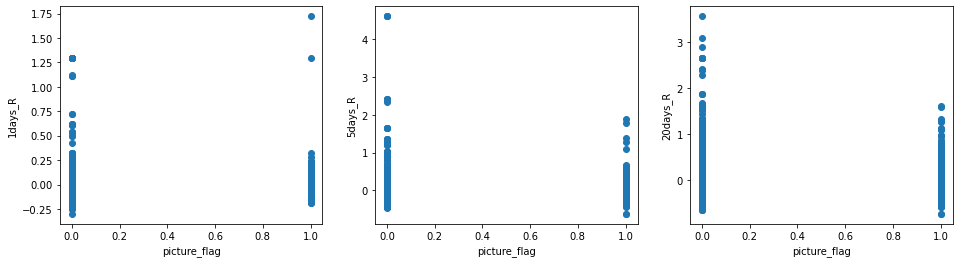

In [18]:
# 散布図
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.scatter(x=df_target['picture_flag'], y=df_target['1days_R'])
plt.ylabel('1days_R')
plt.xlabel('picture_flag')

plt.subplot(1, 3, 2)
plt.scatter(x=df_target['picture_flag'], y=df_target['5days_R'])
plt.ylabel('5days_R')
plt.xlabel('picture_flag')

plt.subplot(1, 3, 3)
plt.scatter(x=df_target['picture_flag'], y=df_target['20days_R'])
plt.ylabel('20days_R')
plt.xlabel('picture_flag')

リターンが-1.0となっている銘柄がある。  
⇒ 確認したところ、ニュース公表時(リターンの計算時点)の株価が0(価格が決定されない)となっていた。  
⇒　これらの銘柄は除外することにする。

In [19]:
# 確認用
#df_target[df_target['1days_R'] == -1]
#df_price_one_code = df_price[df_price['Local Code'] == 9829]
#mask = df_price_one_code.index > pd.to_datetime('2020/01/21')
#df_price_one_code[mask]

In [20]:
# リターンが-1とnp.nanは除外
df_target = df_target[(df_target['1days_R'] != -1) & (df_target['5days_R'] != -1) & (df_target['20days_R'] != -1)]
df_target.dropna(subset=['1days_R', '5days_R', '20days_R'], inplace=True)

Text(0.5, 0, 'picture_flag')

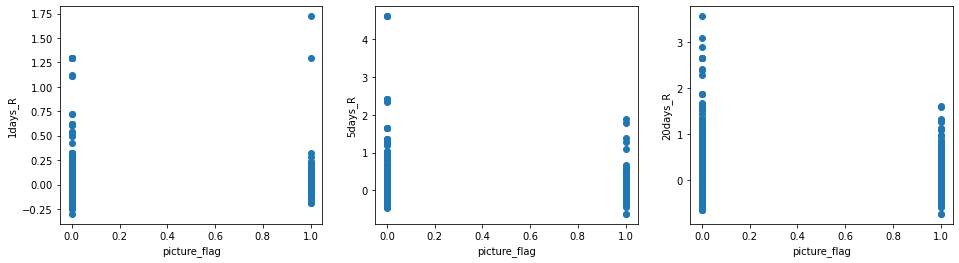

In [21]:
# 散布図
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.scatter(x=df_target['picture_flag'], y=df_target['1days_R'])
plt.ylabel('1days_R')
plt.xlabel('picture_flag')

plt.subplot(1, 3, 2)
plt.scatter(x=df_target['picture_flag'], y=df_target['5days_R'])
plt.ylabel('5days_R')
plt.xlabel('picture_flag')

plt.subplot(1, 3, 3)
plt.scatter(x=df_target['picture_flag'], y=df_target['20days_R'])
plt.ylabel('20days_R')
plt.xlabel('picture_flag')

In [22]:
df_target.head()

,article_id,publish_datetime,media_code,media_name,men_name,page_from,picture_flag,paragraph_cnt,char_length,headline,keywords,classifications,company_g.stock_code,1days_R,5days_R,20days_R
10,TDSKDBDGXMZO5400542031122019NN1000,2020-01-01 15:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,1.0,19,1778,ゴーン元会長、周到な不意打ち出国 司法批判の声明,カルロス・ゴーン\n日産自動車\nグレッグ・ケリー\n弘中惇一郎\nＭｕｓｉｃＴｅｌｅｖｉｓ...,＄絵写表記事\nＴ７２０１\nＰＤ２７１\nＮ０００１３５１\nＮ００４４３７１\n＃Ｗ５０...,7201,0.017586,-0.011990,-0.060592
19,TDSKDBDGXMZO5387164027122019L41000,2020-01-01 15:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,1.0,12,1347,地銀が変わる、始まったマニュアルなき大競争,金融検査マニュアル\nマニュアル\n笹原晶博\n安田光春\n金融機関\n銀行\n地方銀行\n...,＄絵写表記事\nＴ８５２４\nＰＤ４７３\nＮ００７００１７\nＮ００７００８７\n＃Ｗ２０...,8524,0.008439,-0.046414,-0.067511
22,TDSKDBDGXKZO5400896001012020MM8000,2020-01-01 15:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,0.0,4,569,元日付のこういうコラムは、ふつうなら来し方行く末に思いをはせ、まずは新年をことほぐものである...,春秋\nカルロス・ゴーン\nコラム\n来し方行く末\n思い\n日付\n新年,「春秋」\n＊春秋\nＴ７２０１\nＰＤ２７１\nＮ０００１３５１\n＃Ｗ５０３０５\n＃Ｗ...,7201,0.017586,-0.011990,-0.060592
26,TDSKDBDGXMZO5345668017122019000000,2020-01-01 15:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,1.0,29,3109,Googleの最新AI、読解力も人間超え 驚異の学習法\n超人間・万能AI（上）,中田敦\nストックマーク\nグーグル\nＢＥＲＴ\nＡＩ\nＮＩＩ\nロボット\n言語モデル...,＄絵写表記事\nＴ９４３２\nＰＤ６５１\nＮ００１５００６,9432,0.013469,0.016382,0.012013
30,TDSKDBDGXMZO5368986023122019L60000,2020-01-01 15:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,1.0,17,1429,日光、国際リゾート地に リッツ・カールトン5月開業\n注目施設2020(1),インタビュー\nザ・リッツ・カールトン日光\nザ・リッツ・カールトン\nマリオット・インター...,＄絵写表記事\nＴ９００１\nＰＤ５５１\nＮ０００１８３１\n＃Ｋ６\n＃Ａ４０８\n＃Ａ...,9001,0.026992,0.021851,-0.003856


In [23]:
abs_returns = np.zeros((2, 3))
pos_returns = np.zeros((2, 3))
neg_returns = np.zeros((2, 3))

for i in range(2):
    df_i = df_target[df_target['picture_flag'] == i][['1days_R', '5days_R', '20days_R']].replace([np.inf, -np.inf], np.nan).dropna().copy()
    abs_returns[i, :] = df_i.abs().mean().values
    pos_returns[i, :] = df_i[df_i >= 0].mean(skipna=True).values
    neg_returns[i, :] = df_i[df_i < 0].mean(skipna=True).values

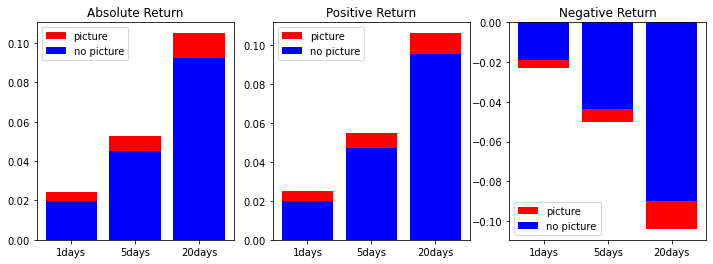

In [24]:
x = ['1days', '5days', '20days']

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.bar(x, abs_returns[0], label='picture', color='r')
plt.bar(x, abs_returns[1], label='no picture', color='b')
plt.title('Absolute Return')
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(x, pos_returns[0], label='picture', color='r')
plt.bar(x, pos_returns[1], label='no picture', color='b')
plt.title('Positive Return')
plt.legend()

plt.subplot(1, 3, 3)
plt.bar(x, neg_returns[0], label='picture', color='r')
plt.bar(x, neg_returns[1], label='no picture', color='b')
plt.title('Negative Return')
plt.legend()

pictureの有無でリターンに差がありそう  
⇒「平均の差の検定」

In [29]:
from scipy import stats
t_stats = {}
for i, days in enumerate(x):
    df_0 = df_target[df_target['picture_flag'] == 0][f'{days}_R'].replace([np.inf, -np.inf], np.nan).dropna()
    df_1 = df_target[df_target['picture_flag'] == 1][f'{days}_R'].replace([np.inf, -np.inf], np.nan).dropna()
    
    abs_return_0 = df_0.abs().values
    abs_return_1 = df_1.abs().values
    t, p = stats.ttest_ind(abs_return_0, abs_return_1, equal_var=False)
    t_stats[('Absolute Return', days)] = p
    
    pos_return_0 = df_0[df_0 >= 0].values
    pos_return_1 = df_1[df_1 >= 0].values
    t, p = stats.ttest_ind(pos_return_0, pos_return_1, equal_var=False)
    t_stats[('Positive Return', days)] = p
    
    neg_return_0 = df_0[df_0 < 0].values
    neg_return_1 = df_1[df_1 < 0].values
    t = stats.ttest_ind(neg_return_0, pos_return_1, equal_var=False)
    t_stats[('Negative Return', days)] = p

In [30]:
df_pvalue = pd.DataFrame(pd.Series(t_stats), columns=['p-value']).unstack()
df_pvalue = df_pvalue[[('p-value', '1days'), ('p-value', '5days'), ('p-value', '20days')]] # 並び替え
df_pvalue.round(4)

p-value             
                  1days 5days 20days
Absolute Return     0.0   0.0    0.0
Negative Return     0.0   0.0    0.0
Positive Return     0.0   0.0    0.0

帰無仮説:「写真の有無のリターンの平均に差はない」  
p値がゼロであることから帰無仮説は棄却され、統計的に写真の有無はリターンに差がある可能性がある。  

写真があるニュースはその日の出来事の中で特に注目される(影響の大きい)記事であることが多い為、  
上記のような結果となるのは実感からして納得がいく。  

## 記事の文字数の多さについて
記事が文字数が多いほど市場への影響が大きいニュースの可能性が高い。  
文字数の多さでユニバースを5分位に分け、第1分位と第5分位でリターンの差が見られるか検証する。  
記事は2020年からしか無い為、2020年・2021年の全期間を対象とする

Text(0, 0.5, 'freq')

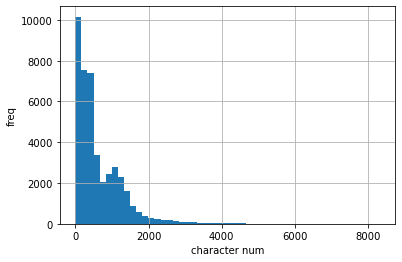

In [31]:
df_target['char_length'].hist(bins=50)
plt.xlabel('character num')
plt.ylabel('freq')

全体的に文字数は少ない記事が多い。

Text(0.5, 0, 'char_length')

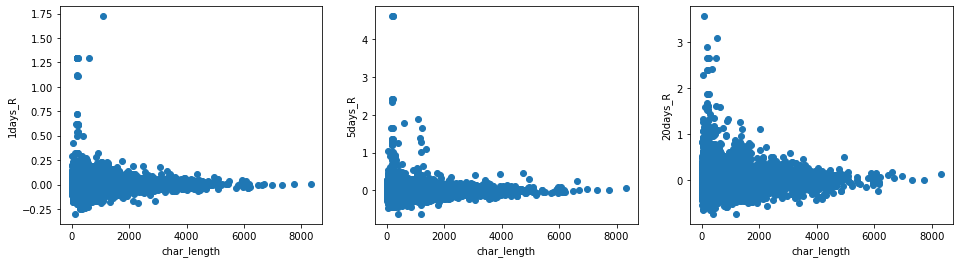

In [27]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.scatter(x=df_target['char_length'], y=df_target['1days_R'])
plt.ylabel('1days_R')
plt.xlabel('char_length')

plt.subplot(1, 3, 2)
plt.scatter(x=df_target['char_length'], y=df_target['5days_R'])
plt.ylabel('5days_R')
plt.xlabel('char_length')


plt.subplot(1, 3, 3)
plt.scatter(x=df_target['char_length'], y=df_target['20days_R'])
plt.ylabel('20days_R')
plt.xlabel('char_length')

全体的にリターンは若干プラスに偏っているように見える。  
記事が長くなると、リターンは0近辺に集中している。  
⇒長い記事であるほど市場ではすでに既知となっており、すでに価格に織り込まれているのかもしれない。  
　短い記事では即効性があるため、その分市場へのインパクトも大きく、リターンにばらつきが見られるように思われる。
 
このグラフはJane Street(Kaggleのコンペ)で見覚えがある。

In [28]:
p_tiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
port_returns = np.zeros((5, 3))

for i in range(len(p_tiles)-1):
    p_0 = df_target['char_length'].quantile(p_tiles[i])
    p_1 = df_target['char_length'].quantile(p_tiles[i+1])
    if i != 4:
        port_i = df_target[(df_target['char_length'] >= p_0) & (df_target['char_length'] < p_1)]
    else:
        port_i = df_target[(df_target['char_length'] >= p_0) & (df_target['char_length'] <= p_1)]
    
    # ポートフォリオのリターンを計算する
    port_returns[i, 0] = np.mean([r for r in port_i['1days_R'] if r != np.inf and r != -np.inf])
    port_returns[i, 1] = np.mean([r for r in port_i['5days_R'] if r != np.inf and r != -np.inf])
    port_returns[i, 2] = np.mean([r for r in port_i['20days_R'] if r != np.inf and r != -np.inf])

Text(0, 0.5, 'Portfolio Return')

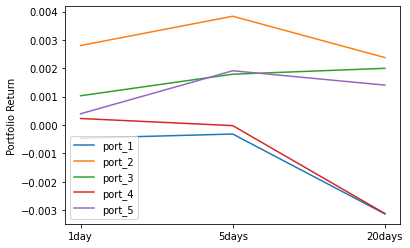

In [29]:
plt.figure()
for i in range(5):
    plt.plot(["1day", "5days", "20days"], port_returns[i], label=f'port_{i+1}')
plt.legend()
plt.ylabel('Portfolio Return')

文字数によるリターンの差は見られなかった。  
文字数が一番少ないport_1では、マイナスになりやすい傾向があるのかもしれない。  
文字数が一番多いport_5はプラスのリターンの傾向があるようにも見えるが、port_4ではリターンがマイナスの傾向があるため、  
文字数が多い場合にプラスの傾向が見られるとは一概には言えない。

## 週次集計

* ニュースは毎週どれだけ公表されているか。

In [30]:
df_target_2 = df_article[df_article['company_g.stock_code'].isin(codes)].copy()
df_target_2.set_index('publish_datetime', inplace=True)
df_target_2.index = pd.to_datetime(df_target_2.index)
df_target_2.head(1)

,article_id,media_code,media_name,men_name,page_from,picture_flag,paragraph_cnt,char_length,headline,keywords,classifications,company_g.stock_code
publish_datetime,,,,,,,,,,,,
2020-01-01 00:00:33+09:00,TDSKDBDGXMZO5400542031122019NN1000,TNY,日本経済新聞電子版,NaN,NaN,有,19,1778,ゴーン元会長、周到な不意打ち出国 司法批判の声明,カルロス・ゴーン\n日産自動車\nグレッグ・ケリー\n弘中惇一郎\nＭｕｓｉｃＴｅｌｅｖｉｓ...,＄絵写表記事\nＴ７２０１\nＰＤ２７１\nＮ０００１３５１\nＮ００４４３７１\n＃Ｗ５０...,7201


In [31]:
df_target_2.resample('W').count()['article_id'].describe()

count      53.000000
mean      862.566038
std       255.235676
min        80.000000
25%       762.000000
50%       841.000000
75%      1021.000000
max      1509.000000
Name: article_id, dtype: float64

1週間当たり平均860件ほどのニュースが公表される。    
少なくても80件のニュースは公表されている。  
⇒直近の1週間のニュースをベースにポートフォリオを組成することができるかもしれない。

## イベントスタディ分析
* ニュースが公表された銘柄とそうでない銘柄でリターンに差はあるのか
* もし差があるとしたらニュースが出されてから何日間継続するのか。  
  過去n日に公表された銘柄を対象とする際の目安となる。  
  
#### ニュースの影響を見るため、各銘柄でイベントスタディ分析をしてみる。  
* マーケットリターンはTOPIXを利用  
* 無リスク金利
  * 日本国債10年 https://fred.stlouisfed.org/series/IRLTLT01JPM156N
  * 無担保コール翌日物金利 https://fred.stlouisfed.org/series/IRSTCI01JPM156N  

(参考)http://www.ier.hit-u.ac.jp/~iwaisako/class/MECON1_2008/HIT_lec07_08dist.pdf  
　　　http://miyazakidesu.hatenablog.com/entry/2014/08/04/111449

In [32]:
import pandas_datareader.data as pdr
TOPIX = pdr.DataReader('1305.T', 'yahoo', '2008/01/01') # Daiwa Topix Listed
TOPIX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-07,1420.400024,1420.400024,1420.400024,1420.400024,0.0,1420.400024
2008-01-08,1431.199951,1431.199951,1431.199951,1431.199951,0.0,1431.199951
2008-01-09,1452.699951,1452.699951,1452.699951,1452.699951,0.0,1452.699951
2008-01-10,1429.300049,1429.300049,1429.300049,1429.300049,0.0,1429.300049
2008-01-11,1405.300049,1405.300049,1405.300049,1405.300049,0.0,1405.300049


In [33]:
RF_rate = pdr.DataReader('IRSTCI01JPM156N', 'fred', '2008/01/01') / 100 # Immediate Rates: Less than 24 Hours: Call Money/Interbank Rate for Japan
RF_rate.head()

,IRSTCI01JPM156N
DATE,
2008-01-01,0.00502
2008-02-01,0.00504
2008-03-01,0.00511
2008-04-01,0.00506
2008-05-01,0.00505


月次データになっているため、日次に変換する必要あり。  
今回はデータがこれ以外無い(ネットから拾うのは面倒な)為、月次を日次に変換したものを利用する。

In [34]:
RF_rate = RF_rate.resample('D').fillna(method='ffill')
RF_rate.columns = ['R_f']
RF_rate.head()

,R_f
DATE,
2008-01-01,0.00502
2008-01-02,0.00502
2008-01-03,0.00502
2008-01-04,0.00502
2008-01-05,0.00502


In [35]:
df_target.head(1)

,article_id,publish_datetime,media_code,media_name,men_name,page_from,picture_flag,paragraph_cnt,char_length,headline,keywords,classifications,company_g.stock_code,1days_R,5days_R,20days_R
10,TDSKDBDGXMZO5400542031122019NN1000,2020-01-01 15:00:00+09:00,TNY,日本経済新聞電子版,NaN,NaN,1.0,19,1778,ゴーン元会長、周到な不意打ち出国 司法批判の声明,カルロス・ゴーン\n日産自動車\nグレッグ・ケリー\n弘中惇一郎\nＭｕｓｉｃＴｅｌｅｖｉｓ...,＄絵写表記事\nＴ７２０１\nＰＤ２７１\nＮ０００１３５１\nＮ００４４３７１\n＃Ｗ５０...,7201,0.017586,-0.01199,-0.060592


In [36]:
# 回帰モデルを定義
from sklearn import linear_model
 
window = 130 # 推定ウィンドウサイズ(営業日), 祝日などがあるため、実際はこれより小さくなる

Rs, ARs, CARs = [], [], [] # 推定時の決定係数, 異常リターン, 累積異常リターン

for i in df_target.index:
    # 対象銘柄の価格情報
    df_price_one_code = df_price[df_price['Local Code'] == int(df_target['company_g.stock_code'][i])]
    
    # 推定に必要なデータをマージする
    df_price_one_code = pd.merge(df_price_one_code, TOPIX['Adj Close'], left_index=True, right_index=True)
    df_price_one_code = pd.merge(df_price_one_code, RF_rate, left_index=True, right_index=True)
    
    # 推定に必要なデータを計算
    df_price_one_code['R_i'] = np.log(df_price_one_code['EndOfDayQuote ExchangeOfficialClose']).diff()
    df_price_one_code['R_M'] = np.log(df_price_one_code['Adj Close']).diff()
    df_price_one_code['R_M-R_f'] = df_price_one_code['R_M'] - df_price_one_code['R_f']
    df_price_one_code.dropna(subset=['R_f', 'R_i', 'R_M', 'R_M-R_f'], inplace=True)
    
    # 時点の設定
    event_date = pd.to_datetime(df_target['publish_datetime'][i].date()) 
    t_0 = event_date - pd.offsets.BDay(n=window + 2) # 推定ウィンドウの開始時点
    t_1 = event_date - pd.offsets.BDay(n=2)          # 推定ウィンドウ時点
    t_2 = event_date - pd.offsets.BDay(n=1)          # イベントウィンドウの開始時点
    t_3 = event_date + pd.offsets.BDay(n=1)          # イベントウィンドウの終了時点
    
    # 推定できるデータ量があるかチェック
    if t_0 < df_price_one_code.index[0]  or df_price_one_code.index[-1] < t_3 :
        # インデックスサイズがオーバーのため、スキップ
        continue 
    
    # 推定(イベント日-132 ～ イベント日-2)
    estimate_window = df_price_one_code[(df_price_one_code.index >= t_0) & (df_price_one_code.index <= t_1)]
    
    # 説明変数
    X = estimate_window['R_M-R_f'].values[1:].reshape(-1, 1) # nanを除く

    # 目的変数
    Y = estimate_window['R_i'].values[1:].reshape(-1, 1) # nanを除く

    # 予測モデルを作成
    clf = linear_model.LinearRegression()
    clf.fit(X, Y)
    
    # イベントウィンドウ
    event_window = df_price_one_code[(df_price_one_code.index >= t_2) & (df_price_one_code.index <= t_3)]
    
    # イベント日が前後の3日間で株価が取得できない場合はスキップ
    if len(event_window) < 3:
        continue
    
    # アブノーマルリターン, 累積アブノーマルリターンを推定
    AR = event_window['R_i'].values - (clf.intercept_ + clf.coef_ * event_window['R_M-R_f'].values)
    CAR = np.sum(AR)
    
    # 結果を格納
    Rs.append(clf.score(X, Y))
    ARs.append(AR)
    CARs.append(CAR)

In [120]:
results = pd.concat([pd.DataFrame(pd.Series(Rs), columns=['R2']), 
                     pd.DataFrame(np.array(ARs)[:, 0], columns=['AR_0', 'AR_1', 'AR_2']),
                     pd.DataFrame(pd.Series(CARs), columns=['CAR'])], axis=1)
results.head()

,R2,AR_0,AR_1,AR_2,CAR
0,0.128830,-0.007562,-0.003897,-0.003800,-0.015259
1,0.194981,0.010013,-0.023147,-0.001675,-0.014810
2,0.194981,0.010013,-0.023147,-0.001675,-0.014810
3,0.194981,0.010013,-0.023147,-0.001675,-0.014810
4,0.169658,-0.000717,0.014798,-0.012945,0.001136


In [127]:
results.describe()

,R2,AR_0,AR_1,AR_2,CAR
count,3.617100e+04,36171.000000,36171.000000,36171.000000,36171.000000
mean,3.578972e-01,0.000576,0.000803,-0.000623,0.000756
std,1.817922e-01,0.027272,0.037584,0.026941,0.055110
min,8.067791e-08,-0.309136,-0.339324,-0.305852,-0.657586
25%,2.201126e-01,-0.010904,-0.013029,-0.012087,-0.022045
50%,3.660970e-01,-0.000241,-0.000237,-0.000625,-0.000084
75%,4.950691e-01,0.010957,0.012578,0.010447,0.020631
max,7.776116e-01,0.749464,0.310823,0.330348,0.706007


In [123]:
# 検定
t, p = stats.ttest_1samp(results['CAR'] / results['CAR'].std(), 0)
print(t, p)

2.6078380054921504 0.009115349275050585


<AxesSubplot:>

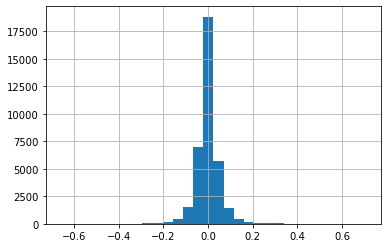

In [129]:
results['CAR'].hist(bins=30)

有意水準1%で帰無仮説:平均$ \mu=0 $は棄却される。  
⇒ ニュースの公表はインパクトがある。

In [143]:
# Post Windowについても見てみる

window = 130 # 推定ウィンドウサイズ(営業日), 祝日などがあるため、実際はこれより小さくなる

R2s, ARs, Post_ARs, CARs = [], [], [], [] 

for i in df_target.index:
    # 対象銘柄の価格情報
    df_price_one_code = df_price[df_price['Local Code'] == int(df_target['company_g.stock_code'][i])]
    
    # 推定に必要なデータをマージする
    df_price_one_code = pd.merge(df_price_one_code, TOPIX['Adj Close'], left_index=True, right_index=True)
    df_price_one_code = pd.merge(df_price_one_code, RF_rate, left_index=True, right_index=True)
    
    # 推定に必要なデータを計算
    df_price_one_code['R_i'] = np.log(df_price_one_code['EndOfDayQuote ExchangeOfficialClose']).diff()
    df_price_one_code['R_M'] = np.log(df_price_one_code['Adj Close']).diff()
    df_price_one_code['R_M-R_f'] = df_price_one_code['R_M'] - df_price_one_code['R_f']
    df_price_one_code.dropna(subset=['R_f', 'R_i', 'R_M', 'R_M-R_f'], inplace=True)
    
    # 時点の設定
    event_date = pd.to_datetime(df_target['publish_datetime'][i].date()) 
    t_0 = event_date - pd.offsets.BDay(n=window + 2) # 推定ウィンドウの開始時点
    t_1 = event_date - pd.offsets.BDay(n=2)          # 推定ウィンドウ時点
    t_2 = event_date - pd.offsets.BDay(n=1)          # イベントウィンドウの開始時点
    t_3 = event_date + pd.offsets.BDay(n=1)          # イベントウィンドウの終了時点
    t_4 = event_date + pd.offsets.BDay(n=2)          # ポストウィンドウの開始時点
    t_5 = event_date + pd.offsets.BDay(n=22)         # ポストウィンドウの終了時点
    
    # 推定できるデータ量があるかチェック
    if t_0 < df_price_one_code.index[0]  or df_price_one_code.index[-1] < t_3 :
        # インデックスサイズがオーバーのため、スキップ
        continue 
    
    # 推定(イベント日-132 ～ イベント日-2)
    estimate_window = df_price_one_code[(df_price_one_code.index >= t_0) & (df_price_one_code.index <= t_1)]
    
    # 説明変数
    X = estimate_window['R_M-R_f'].values[1:].reshape(-1, 1) # nanを除く

    # 目的変数
    Y = estimate_window['R_i'].values[1:].reshape(-1, 1) # nanを除く

    # 予測モデルを作成
    clf = linear_model.LinearRegression()
    clf.fit(X, Y)
    
    # ウィンドウ
    event_window = df_price_one_code[(df_price_one_code.index >= t_2) & (df_price_one_code.index <= t_3)]
    post_window = df_price_one_code[(df_price_one_code.index >= t_4) & (df_price_one_code.index <= t_5)]
    
    # 株価が取得できない場合はスキップ
    if len(event_window) < 3 or len(post_window) < 20:
        continue
    
    # アブノーマルリターンを推定
    AR = event_window['R_i'].values - (clf.intercept_ + clf.coef_ * event_window['R_M-R_f'].values)
    Post_AR = post_window['R_i'].values - (clf.intercept_ + clf.coef_ * post_window['R_M-R_f'].values)
    CAR = np.sum(AR)
    
    # 結果を格納
    R2s.append(clf.score(X, Y))
    ARs.append(AR)
    CARs.append(CAR)
    Post_ARs.append(Post_AR)

In [251]:
results2 = pd.concat([pd.DataFrame(pd.Series(R2s), columns=['R2']), 
                      pd.DataFrame(np.array(ARs)[:, 0], columns=['AR_0', 'AR_1', 'AR_2']),
                      pd.DataFrame(pd.Series(CARs), columns=['CAR']),
                      pd.DataFrame([v.reshape(-1) for v in  Post_ARs], 
                                    columns=[f'AR_{i+3}' for i in range(21)]).dropna(axis=1).reset_index(drop=True),
                     ], axis=1) # なぜか列数が21となるため、drop()で対応
results2.head()

,R2,AR_0,AR_1,AR_2,CAR,AR_3,AR_4,AR_5,AR_6,AR_7,...,AR_13,AR_14,AR_15,AR_16,AR_17,AR_18,AR_19,AR_20,AR_21,AR_22
0,0.128830,-0.007562,-0.003897,-0.003800,-0.015259,0.000852,0.002784,-0.004835,0.001227,0.027619,...,-0.014306,0.011629,0.007914,-0.010992,0.014925,-0.002662,-0.000235,-0.021305,-0.010795,0.025516
1,0.194981,0.010013,-0.023147,-0.001675,-0.014810,-0.005370,0.029857,0.001260,0.004146,0.011401,...,-0.019324,-0.009113,0.028143,-0.012644,0.004742,-0.017907,-0.048328,0.013265,-0.015670,-0.034767
2,0.194981,0.010013,-0.023147,-0.001675,-0.014810,-0.005370,0.029857,0.001260,0.004146,0.011401,...,-0.019324,-0.009113,0.028143,-0.012644,0.004742,-0.017907,-0.048328,0.013265,-0.015670,-0.034767
3,0.194981,0.010013,-0.023147,-0.001675,-0.014810,-0.005370,0.029857,0.001260,0.004146,0.011401,...,-0.019324,-0.009113,0.028143,-0.012644,0.004742,-0.017907,-0.048328,0.013265,-0.015670,-0.034767
4,0.169658,-0.000717,0.014798,-0.012945,0.001136,0.000201,0.004155,-0.001309,-0.007503,0.005054,...,0.015649,0.032542,-0.005294,0.006481,0.011057,0.018332,0.003959,0.006830,-0.000971,0.006234


In [252]:
# 検定
t, p = stats.ttest_1samp(results2['CAR'] / results2['CAR'].std(), 0)
print(t, p)

-1.5079763823526438 0.13157466524774059


<AxesSubplot:>

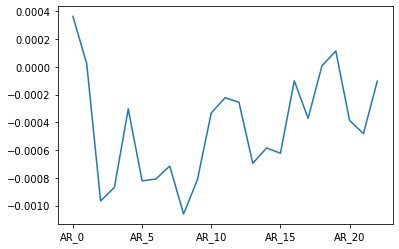

In [270]:
AR_col = results2.columns[results2.columns.str.contains('AR_')]
results2[AR_col].mean().plot()

 公表直後は市場へインパクトがあるが、20日も立つと影響はなくなるように見える。  

今回はニュースの内容にかかわらず、公表後の影響を見た。  
ニュースの内容を識別をするためのアプローチとしては以下が考えられる。  
* 極性値に基づく付与 (今回のコンペでは厳しい)
* 将来のリターンと紐づける

チュートリアルでは、ユニバースの週次リターン予測にニュースを利用し、下落の予兆を検知した際に現金比率を上げる戦略に利用していた。  
「各週の数千個のニュースを利用して、次の週に値上がりする銘柄を予測するには、ニュース数と銘柄のバランスから難しいそう」と記載有り。 

#### 一旦、個別銘柄ごとに将来のリターンと紐づけてニュースの分類器を作ってみる。  
ただ、ニュース記事は1年分しか無い為、検証にはAPIで取得できるニュースを利用することにする。

(追記)  
ニュース公表後にマイナスが大きい場合、平均への回帰を利用したトレーディング手法を作るとよいのかもしれない。  
ただし、今回のコンペでは5営業日後のリターンが成績となるため、この戦略を利用するには期間が短いかもしれない。

## APIを利用してみる

In [272]:
import os
import json
import requests
import base64

In [278]:
def call_refresh_api(refreshtoken: str):
    """
    idTokenをリフレッシュするメソッド。

    Parameters
    ----------
    refreshtoken : str
        refreshtoken。ログイン後の画面からご確認いただけます。

    Returns
    -------
    resjson : dict
        新しいidtokenが格納されたAPIレスポンス(json形式)
    """
    headers = {"accept": "application/json"}
    data = {"refresh-token": refreshtoken}

    response = requests.post(
        "https://api.jpx-jquants.com/refresh", headers=headers, data=json.dumps(data)
    )

    resjson = json.loads(response.text)
    return resjson

def call_jquants_api(params: dict, idtoken: str, apitype: str, code: str = None):
    """
    J-QuantsのAPIを試すメソッド。

    Parameters
    ----------
    params : dict
        リクエストパラメータ。
    idtoken : str
        idTokenはログイン後の画面からご確認いただけます。
    apitype: str
        APIの種類。"news", "prices", "lists"などがあります。
    code: str
        銘柄を指定するAPIの場合に設定します。

    Returns
    -------
    resjson : dict
        APIレスポンス(json形式)
    """
    datefrom = params.get("datefrom", None)
    dateto = params.get("dateto", None)
    date = params.get("date", None)
    includedetails = params.get("includedetails", "false")
    keyword = params.get("keyword", None)
    headline = params.get("headline", None)
    paramcode = params.get("code", None)
    nexttoken = params.get("nextToken", None)
    headers = {"accept": "application/json", "Authorization": idtoken}
    data = {
        "from": datefrom,
        "to": dateto,
        "includeDetails": includedetails,
        "nextToken": nexttoken,
        "date": date,
        "keyword": keyword,
        "headline": headline,
        "code": paramcode,
    }

    if code:
        code = "/" + code
        r = requests.get(
            "https://api.jpx-jquants.com/" + apitype + code,
            params=data,
            headers=headers,
        )
    else:
        r = requests.get(
            "https://api.jpx-jquants.com/" + apitype, params=data, headers=headers
        )
    resjson = json.loads(r.text)
    return resjson

In [280]:
cur_dir = os.getcwd()
os.chdir('../private/')
from credentials import *
os.chdir(cur_dir)
refreshtoken = REFRESH_TOKEN
id_token = call_refresh_api(refreshtoken)

In [281]:
idtk=id_token['idToken']
paramdict = {}
paramdict["datefrom"] = "2020-02-01"
paramdict["dateto"] = "2020-02-25"
paramdict["code"] = "8697"
paramdict["headline"] = "日本取引所"
paramdict["keyword"] = "エネルギー"
call_jquants_api(paramdict, idtk, "news")

{'news': [{'article_id': 'TDSKDBDGXLASFL21HM9_21022020000000',
   'publish_datetime': '2020-02-21T16:34:00Z',
   'media_code': 'TNY',
   'media_name': '日本経済新聞電子版',
   'men_name': '',
   'headline': '日本取引所ＣＥＯ、東商取のエネルギー市場「早期に統合したい」',
   'keywords': '最高経営責任者\n東京商品取引所\n日本取引所グループ\n清田瞭\nエネルギー市場\n大阪取引所\n統合\n定例\n早期',
   'classifications': 'Ｔ８６９７\nＰＤ５２１\nＮ００４０４３１\nＮ００７５１０７\nＮ００４０７７９',
   'stock_code': '8697'}],
 'scrollId': 'FGluY2x1ZGVfY29udGV4dF91dWlkDnF1ZXJ5VGhlbkZldGNoBRRsbHk1M1hnQkNSalFKN2FodFFwNgAAAAAAAHnZFkd4Qm5xUGs3Uk5DTU94MXI1Ulk1UUEUbDF5NTNYZ0JDUmpRSjdhaHRRcUQAAAAAAAB52hZHeEJucVBrN1JOQ01PeDFyNVJZNVFBFG1GeTUzWGdCQ1JqUUo3YWh0UXFEAAAAAAAAedsWR3hCbnFQazdSTkNNT3gxcjVSWTVRQRRtVnk1M1hnQkNSalFKN2FodFFxRAAAAAAAAHncFkd4Qm5xUGs3Uk5DTU94MXI1Ulk1UUEUbWx5NTNYZ0JDUmpRSjdhaHRRcVoAAAAAAAB53RZHeEJucVBrN1JOQ01PeDFyNVJZNVFB'}